# Ultimate Inc. Data Challenge

In [1]:
import numpy as np
import pandas as pd
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(101)

%matplotlib inline

# Set plotting styles
sns.set_style('white') 

In [2]:
# Machine learning libraries:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [3]:
import warnings 
warnings.simplefilter('ignore')

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [4]:
logins = pd.read_json('logins.json')

In [5]:
logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [6]:
# Sort the values
logins.sort_values(by='login_time', inplace=True)

In [7]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 6 to 93140
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [8]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [9]:
# Any NaN values?
logins.isnull().sum()

login_time    0
dtype: int64

In [10]:
# Add the 'count' column
logins['count'] = 1

In [11]:
logins = logins.set_index('login_time')
logins.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [12]:
# Aggregate login counts based on 15-minute time intervals.
fifteen_min = logins.resample('15T').sum()

In [13]:
fifteen_min.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [14]:
fifteen_min.isnull().sum()

count    407
dtype: int64

In [15]:
# Fill the 407 NaN values with value 0.
fifteen_min['count'].fillna(0, inplace=True)

In [16]:
# fifteen_min.isnull().sum()

Text(0,0.5,'Number of logins')

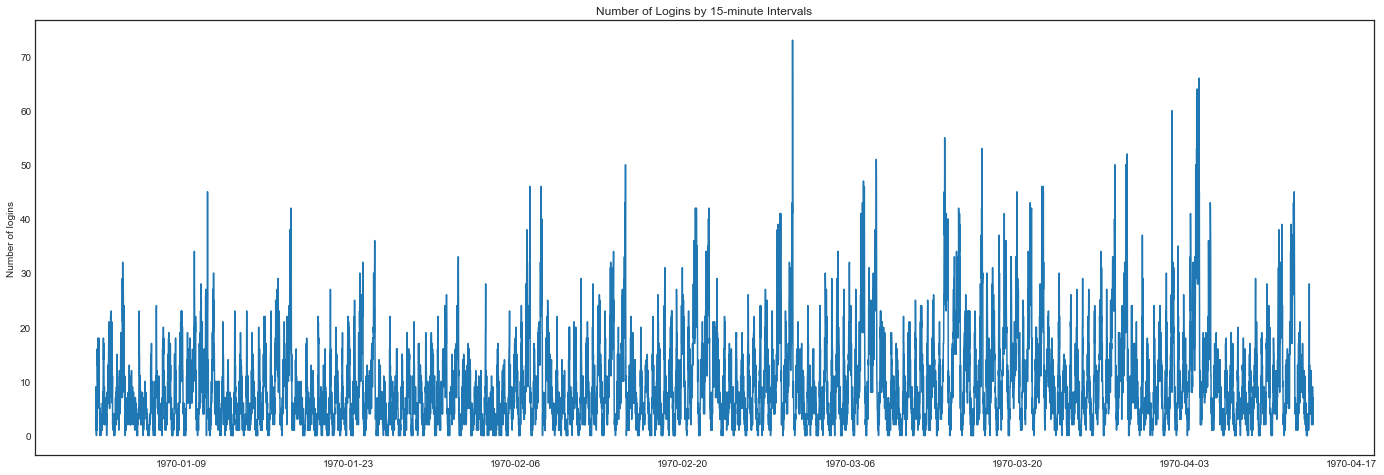

In [17]:
# Plot number of logins by 15-minute intervals.
plt.figure(figsize=(24, 8))
plt.plot(fifteen_min['count'])
plt.title('Number of Logins by 15-minute Intervals')
plt.ylabel('Number of logins')

In [18]:
# Try some other intervals

# B   business day frequency
# C   custom business day frequency (experimental)
# D   calendar day frequency
# W   weekly frequency
# M   month end frequency
# BM  business month end frequency
# MS  month start frequency
# BMS business month start frequency
# Q   quarter end frequency
# BQ  business quarter endfrequency
# QS  quarter start frequency
# BQS business quarter start frequency
# A   year end frequency
# BA  business year end frequency
# AS  year start frequency
# BAS business year start frequency
# H   hourly frequency
# T   minutely frequency
# S   secondly frequency
# L   milliseconds
# U   microseconds

hourly = logins.resample('H').sum()
daily =  logins.resample('D').sum()
weekly = logins.resample('W').sum() 
monthly =  logins.resample('M').sum()

In [19]:
# hourly.head(2)

Text(0,0.5,'Number of logins')

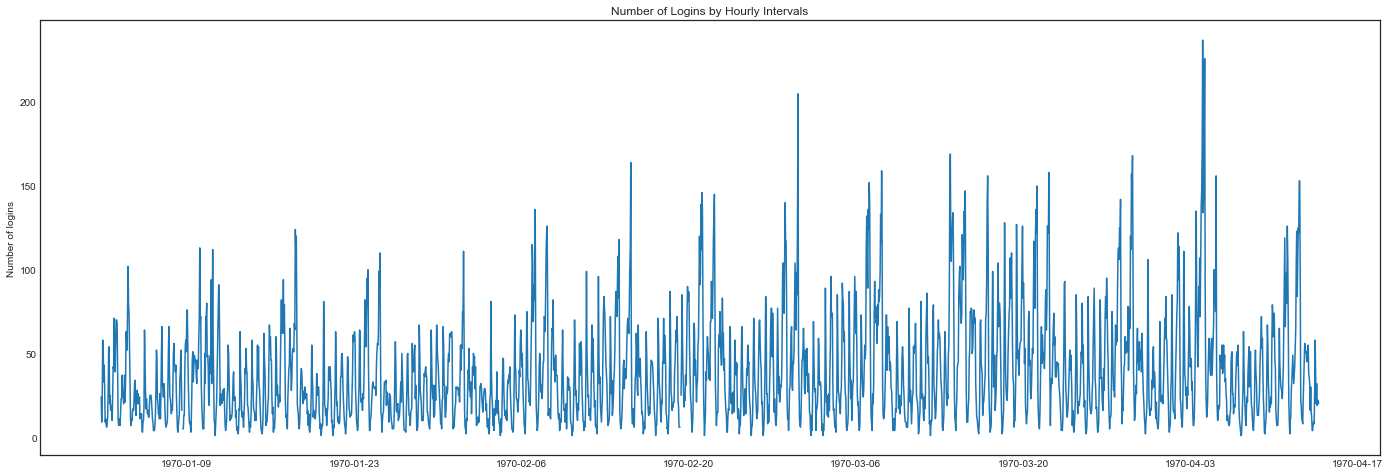

In [20]:
# Plot number of logins by hourly intervals.
plt.figure(figsize=(24, 8))
plt.plot(hourly['count'])
plt.title('Number of Logins by Hourly Intervals')
plt.ylabel('Number of logins')


Text(0,0.5,'Number of logins')

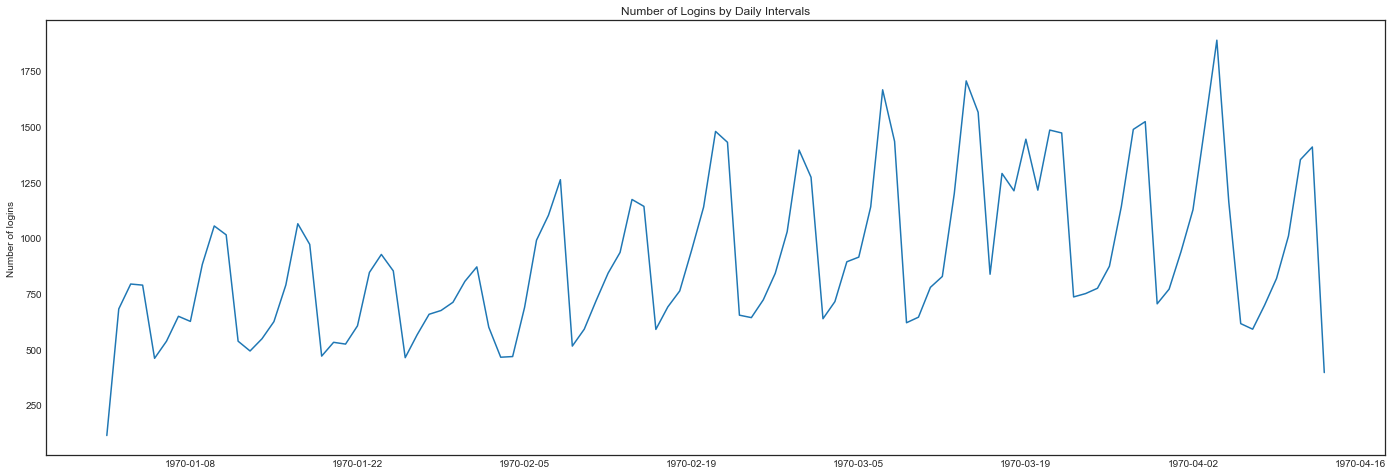

In [21]:
# Plot number of logins by daily intervals.
plt.figure(figsize=(24, 8))
plt.plot(daily['count'])
plt.title('Number of Logins by Daily Intervals')
plt.ylabel('Number of logins')

Text(0,0.5,'Number of logins')

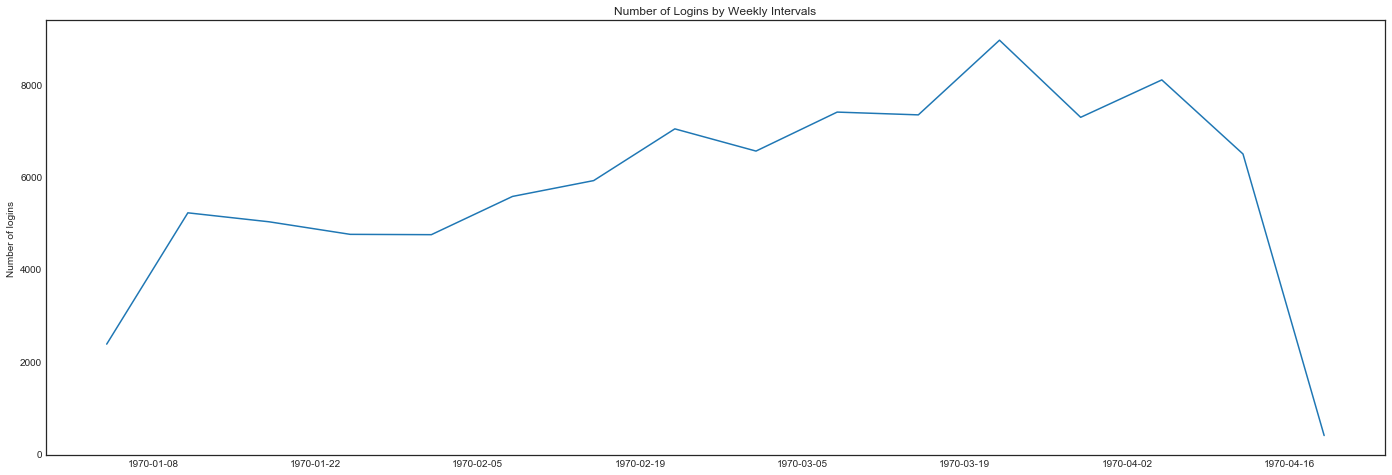

In [22]:
# Plot number of logins by weekly intervals.
plt.figure(figsize=(24, 8)) 
plt.plot(weekly['count'])
plt.title('Number of Logins by Weekly Intervals')
plt.ylabel('Number of logins')

Text(0,0.5,'Number of logins')

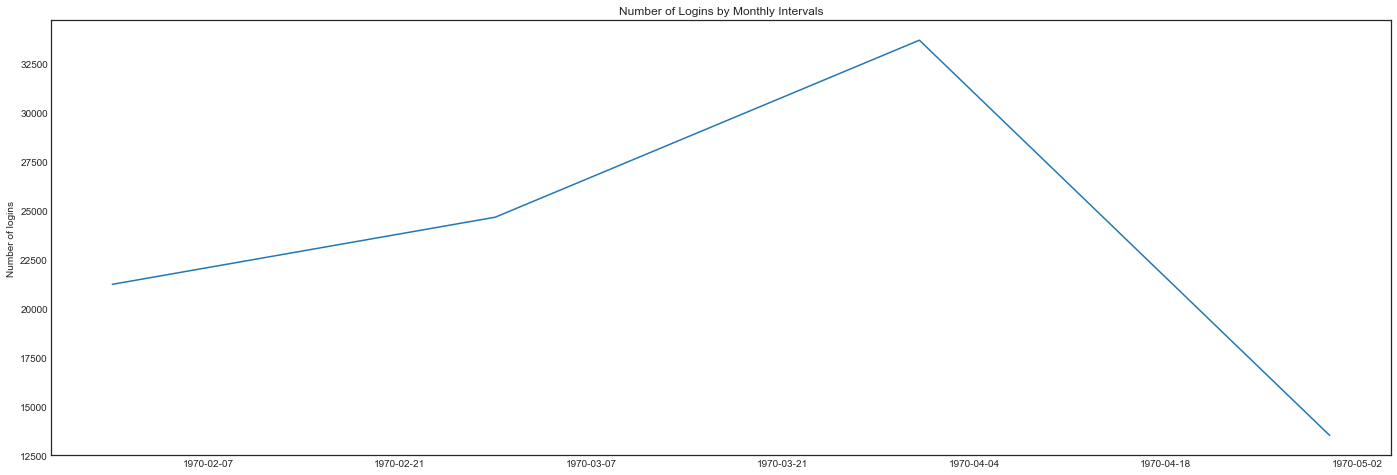

In [23]:
# Plot number of logins by monthly intervals.
plt.figure(figsize=(24, 8)) 
plt.plot(monthly['count'])
plt.title('Number of Logins by Monthly Intervals')
plt.ylabel('Number of logins')

----
Now, let's subset the logins in a different way so that we can see some patterns of the login times more easily.

In [24]:
# logins.head()

In [25]:
logins.reset_index(inplace=True)

In [26]:
logins.head()

,login_time,count
0,1970-01-01 20:12:16,1
1,1970-01-01 20:13:18,1
2,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:16:37,1


In [27]:
# Feature engineer some other columns.
logins['year'] = logins['login_time'].dt.year 
logins['month'] = logins['login_time'].dt.month
logins['day'] = logins['login_time'].dt.day
logins['hour'] = logins['login_time'].dt.hour
logins['minute'] = logins['login_time'].dt.minute
logins['weekday'] = logins['login_time'].dt.dayofweek

In [28]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 8 columns):
login_time    93142 non-null datetime64[ns]
count         93142 non-null int64
year          93142 non-null int64
month         93142 non-null int64
day           93142 non-null int64
hour          93142 non-null int64
minute        93142 non-null int64
weekday       93142 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 5.7 MB


In [29]:
logins.head(2)

,login_time,count,year,month,day,hour,minute,weekday
0,1970-01-01 20:12:16,1,1970,1,1,20,12,3
1,1970-01-01 20:13:18,1,1970,1,1,20,13,3


In [30]:
weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday' , 6: 'Sunday'}

In [31]:
# Add a new column to the data frame 'logins'
logins['weekday_text'] = logins['weekday'].map(weekday_dict)

In [102]:
# logins.head()

In [33]:
logins.weekday_text.value_counts()

Saturday     19377
Sunday       18167
Friday       15208
Thursday     11960
Wednesday    10339
Tuesday       9268
Monday        8823
Name: weekday_text, dtype: int64

In [34]:
# Groupby 'weekday'
logins_weekday = logins.groupby('weekday')[['count']].sum()
logins_weekday.reset_index(inplace=True)
logins_weekday

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


In [36]:
# Add a new column to the data frame 'logins_weekday'
logins_weekday['weekday_text'] = logins_weekday['weekday'].map(weekday_dict)

In [37]:
logins_weekday.set_index('weekday', inplace=True)

In [38]:
logins_weekday

,count,weekday_text
weekday,,
0,8823,Monday
1,9268,Tuesday
2,10339,Wednesday
3,11960,Thursday
4,15208,Friday
5,19377,Saturday
6,18167,Sunday


Text(0,0.5,'Number of logins')

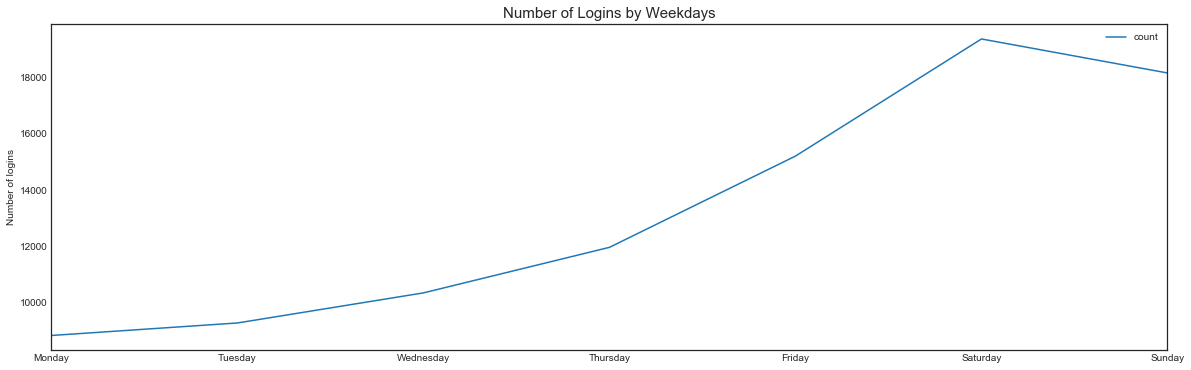

In [103]:
# Plot number of logins by weekdays.
logins_weekday.plot(x='weekday_text', y='count', figsize=(20, 6))
plt.title('Number of Logins by Weekdays', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of logins')

In [40]:
logins.month.value_counts()

3    33723
2    24673
1    21239
4    13507
Name: month, dtype: int64

In [41]:
# Groupby 'month'
logins_month = logins.groupby('month')[['count']].sum()
logins_month.reset_index(inplace=True)
logins_month

,month,count
0,1,21239
1,2,24673
2,3,33723
3,4,13507


In [42]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April'}

In [43]:
# Add a new column to the data frame 'logins_month'
logins_month['month_text'] = logins_month['month'].map(month_dict)

In [44]:
logins_month

,month,count,month_text
0,1,21239,January
1,2,24673,February
2,3,33723,March
3,4,13507,April


Text(0,0.5,'Number of logins')

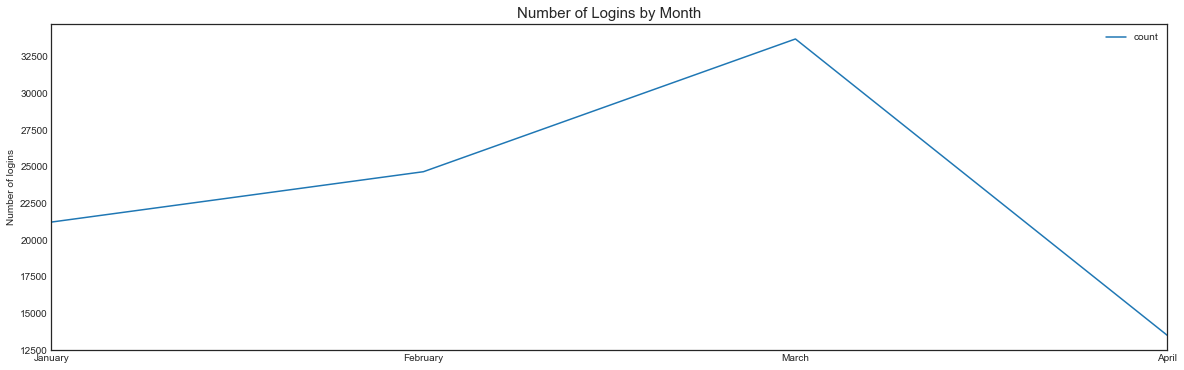

In [105]:
# Plot number of logins by month.
logins_month.plot(x='month_text', y='count', figsize=(20, 6))
plt.title('Number of Logins by Month', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of logins')

In [46]:
logins.hour.value_counts()

22    6607
1     6317
23    6058
0     5993
2     5800
11    5799
21    5623
4     5034
12    4964
3     4831
20    4103
13    3611
14    3426
19    3235
10    3064
15    3038
18    2980
5     2945
16    2832
17    2584
9     1527
6     1138
8      818
7      815
Name: hour, dtype: int64

In [47]:
# Groupby 'hour'
logins_hour = logins.groupby('hour')[['count']].sum()
logins_hour.reset_index(inplace=True)
logins_hour

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


Text(0,0.5,'Number of logins')

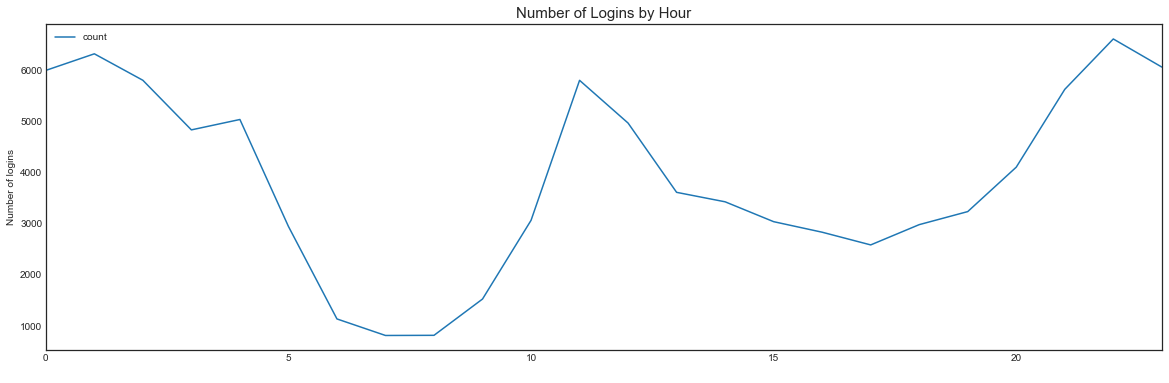

In [106]:
# Plot number of logins by hour.
logins_hour.plot(x='hour', y='count', figsize=(20, 6))
plt.title('Number of Logins by Hour', fontsize=15)
plt.xlabel(' ')
plt.ylabel('Number of logins')

In [108]:
# logins.head()

----
Now, let's subset the data frame 'logins' into two data frames: logins_weekdays and logins_weekdays.

In [50]:
logins_weekdays = logins[(logins.weekday_text != 'Saturday') & (logins.weekday_text != 'Sunday')]

In [51]:
# Groupby 'hour' for the weekdays data frame.
logins_weekdays_hour = logins_weekdays.groupby('hour')[['count']].sum()
logins_weekdays_hour.reset_index(inplace=True)
logins_weekdays_hour

,hour,count
0,0,3616
1,1,3400
2,2,2584
3,3,1610
4,4,1208
5,5,750
6,6,348
7,7,445
8,8,538
9,9,1229


Text(0,0.5,'Number of logins')

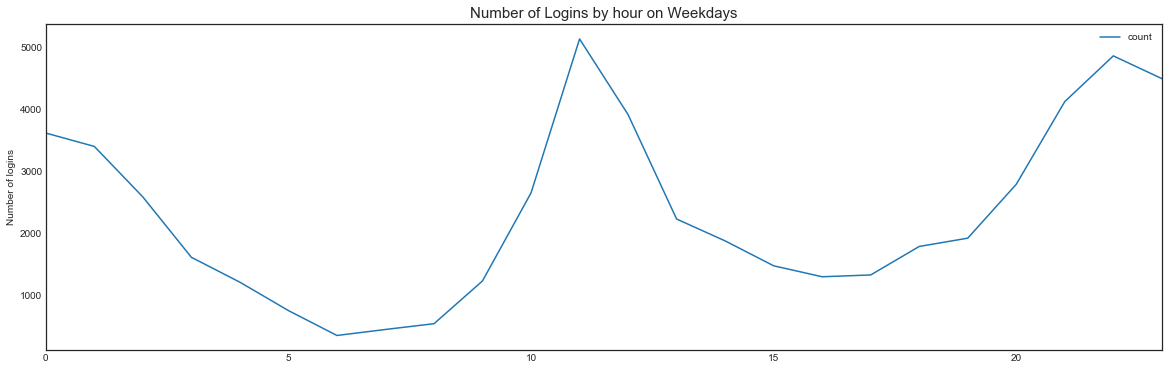

In [109]:
# Plot number of logins by hour on weekdays.
logins_weekdays_hour.plot(x='hour', y='count', figsize=(20, 6))
plt.title('Number of Logins by hour on Weekdays', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of logins')

In [53]:
logins_weekends = logins[(logins.weekday_text == 'Saturday') | (logins.weekday_text == 'Sunday')]

In [54]:
# Check data frame logins_weekends
logins_weekends['weekday_text'].value_counts()

Saturday    19377
Sunday      18167
Name: weekday_text, dtype: int64

In [55]:
# Groupby 'hour' for the weekends data frame.
logins_weekends_hour = logins_weekends.groupby('hour')[['count']].sum()
logins_weekends_hour.reset_index(inplace=True)
logins_weekends_hour

,hour,count
0,0,2377
1,1,2917
2,2,3216
3,3,3221
4,4,3826
5,5,2195
6,6,790
7,7,370
8,8,280
9,9,298


Text(0,0.5,'Number of logins')

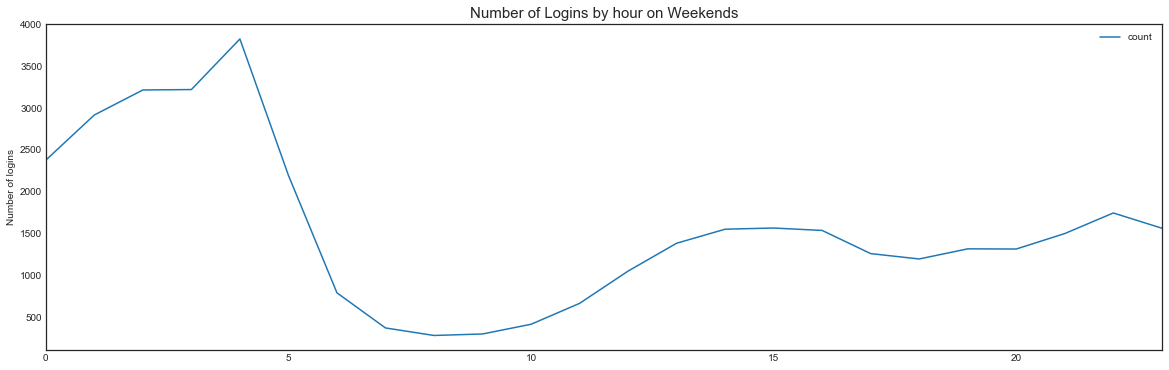

In [110]:
# Plot number of logins by hour on weekends.
logins_weekends_hour.plot(x='hour', y='count', figsize=(20, 6))
plt.title('Number of Logins by hour on Weekends', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of logins')

From the plot for number of logins by weekdays, we see that Saturday and Sunday have the most logins.
From the plot for number of logins by hour on weekdays, we see that on weekdays, there are peak logins 
around 11am and from 9pm to midnight.
From the plot for number of logins by hour on weekends, we see that on weekends, the peak logins times 
are from midnight to 4am.

----
## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: 
on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most 
active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver 
partners to tend to be exclusive to each city. The Ultimate managers of city operations 
for the two cities have proposed an experiment to encourage driver partners to be 
available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver 
partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the 
proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment

    b. what statistical test(s) you will conduct to verify the significance of the
observation

    c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

In [ ]:
# 1. The key measure I would choose is the number of trips each driver partner takes to the other city.
#    I want to to see if this number remains the same after Ultimate Inc. reimburses all toll costs.

In [ ]:
# 2. I would randomly select N (N > 30) number of driver partners from each city. 
#    I would then collect two data points from each of the driver partner: 
#    a) the number of trips each driver partner takes to the other city prior to the
#       tolls being implremented, and 
#    b) the number of trips each driver partner takes to the other city after 
#       Ultimate Inc. reimburses all toll costs.
#    I then compute the difference between the two numbers, d.
#    Now I have N number of d's and I can compute the mean of d (Mu_d) and test if 
#    the Mu_d is zero.

#    The statistical test being used here is called paired t-test.
#    The null hypothesis is Mu_d = 0
#    The alternative hypothesis can be Mu_d > 0

#    If the p-value of this paired t-test is smaller than alpha (normally set to 0.05), 
#    I then reject the null hypothesis and conclude that there is a decrease in number of
#    trips driven to the other city even after the reimbursement. 
#    On the other hand, if the p-value is greater than alpha, I then fail to reject
#    the null hypothesis and conclude that there is no difference in number of
#    trips driven to the other city after the reimbursement plan gets implemented.

## Part 3 ‐ Predictive modeling

In [58]:
import json
with open('./ultimate_data_challenge.json') as data_file:    
    data = json.load(data_file)
df = pd.DataFrame(data)

In [59]:
df.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice).   What fraction of the observed users were retained?


In [61]:
# NaN values?
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [62]:
# Change columns to DateTime objects.
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [63]:
# Beginning and ending DateTime for 'signup_date'
min(df['signup_date']), max(df['signup_date'])

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-31 00:00:00'))

In [64]:
# Beginning and ending DateTime for 'last_trip_date'
min(df['last_trip_date']), max(df['last_trip_date'])

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-07-01 00:00:00'))

In [65]:
# A user is retained if they were “active” (i.e. took a trip) in the preceding 30 days.
# The maximum 'last_trip_date' is 2014-07-01. So the preceding-30-day cutoff is 2014-06-01.

df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

In [66]:
print('The fraction of users retained is: ' + str(df.retained.mean()))

The fraction of users retained is: 0.37608


In [ ]:
# A user is retained if they were “active” (i.e. took a trip) in the preceding 30 days.
# The maximum 'last_trip_date' is 2014-07-01. So the preceding-30-day cutoff is 2014-06-01.
# I then set user with last_trip_date >= 2014-06-01 as a retained user and
# last_trip_date < 2014-06-01 as a non-retained user.

# The fraction of users retained is 0.37608.

#### 2.  Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.  Discuss why you chose your approach, what alternatives you considered, and any concerns you have.   How valid is your model?

In [67]:
# 6th month on the system is between fifth_month_cutoff_date and sixth_month_cutoff_date.
df['fifth_month_cutoff_date'] = df['signup_date'] + datetime.timedelta(days=5*30)
df['sixth_month_cutoff_date'] = df['signup_date'] + datetime.timedelta(days=6*30)

In [68]:
# Feature engineer the target column 'active'
condition = (df['last_trip_date'] >= df['fifth_month_cutoff_date']) & \
            (df['last_trip_date'] <= df['sixth_month_cutoff_date'])
df.loc[condition, 'active'] = 1
df.loc[~condition, 'active'] = 0

In [69]:
df['active'] = df['active'].astype(int)

In [70]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,fifth_month_cutoff_date,sixth_month_cutoff_date,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,2014-06-24,2014-07-24,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,2014-06-28,2014-07-28,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,2014-06-05,2014-07-05,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0,2014-06-09,2014-07-09,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0,2014-06-26,2014-07-26,0


In [71]:
# Current sample has three times more 'inactive' users than 'active' ones.
df.active.value_counts()

0    37299
1    12701
Name: active, dtype: int64

In [111]:
# df.info()

In [73]:
df.isnull().sum()

avg_dist                      0
avg_rating_by_driver        201
avg_rating_of_driver       8122
avg_surge                     0
city                          0
last_trip_date                0
phone                       396
signup_date                   0
surge_pct                     0
trips_in_first_30_days        0
ultimate_black_user           0
weekday_pct                   0
retained                      0
fifth_month_cutoff_date       0
sixth_month_cutoff_date       0
active                        0
dtype: int64

Take care of missing values:

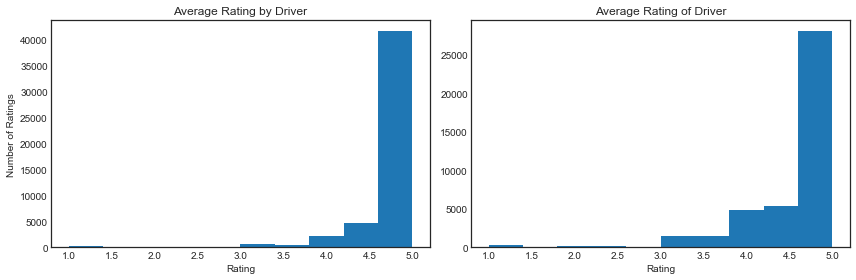

In [74]:
# Plot average rating by driver and of driver.
plt.subplot(1,2,1)
df.avg_rating_by_driver.plot.hist(figsize=(12, 4))
plt.title('Average Rating by Driver')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.tight_layout()

plt.subplot(1,2,2)
df.avg_rating_of_driver.plot.hist(figsize=(12, 4))
plt.title('Average Rating of Driver')
plt.xlabel('Rating')
plt.ylabel('')
plt.tight_layout()

In [75]:
df[['avg_rating_by_driver', 'avg_rating_of_driver']].describe()

,avg_rating_by_driver,avg_rating_of_driver
count,49799.000000,41878.000000
mean,4.778158,4.601559
std,0.446652,0.617338
min,1.000000,1.000000
25%,4.700000,4.300000
50%,5.000000,4.900000
75%,5.000000,5.000000
max,5.000000,5.000000


In [76]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [77]:
# Three columns have missing values:
# 'avg_rating_by_driver' column has 201 missing values. 
# 'avg_rating_of_driver' column has 8122 missing values. 
# 'phone' column has 396 missing values. 

# After careful consideration, I decide to impute mean vlaues for both avg_rating columns 
# and delete the rows of missing values for the phone column.

In [78]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [79]:
df.dropna(subset=['phone'], inplace=True)

In [112]:
# df.isnull().sum()

In [113]:
# df.info()

In [114]:
# df.head()

Text(0.5,1,'Number of Inactive v.s. Active Users')

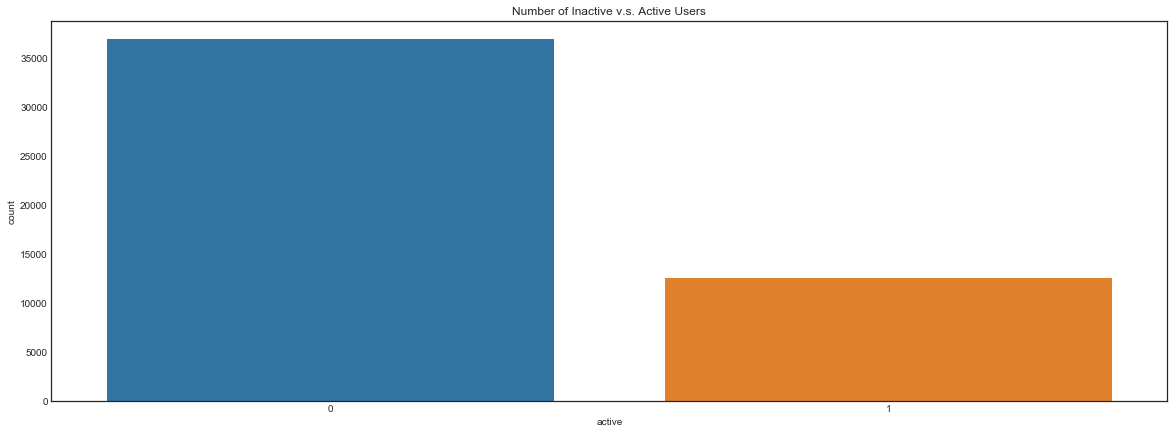

In [83]:
# Plot number of inactive v.s. active users.
plt.figure(figsize=(20,7))
sns.countplot('active', data=df)
plt.title('Number of Inactive v.s. Active Users')

----
### Machine Learning

In [85]:
df.city.value_counts()

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64

In [86]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'retained', 'fifth_month_cutoff_date', 'sixth_month_cutoff_date',
       'active'],
      dtype='object')

In [87]:
# Make a data frame X for features I want to include in my prediction models.
df_ml = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
            'avg_surge', 'city', 'phone', 'surge_pct', 'trips_in_first_30_days', 
            'ultimate_black_user', 'weekday_pct']]

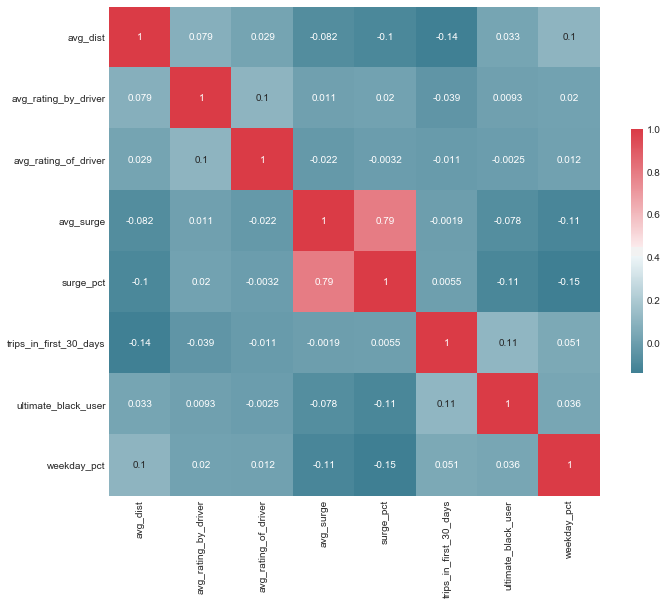

In [88]:
# Compute correlations for the columns of df_ml
corr = df_ml.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap, xticklabels=corr.columns, 
            yticklabels=corr.columns, cbar_kws={"shrink": .5})



In [115]:
# df_ml.info()

In [90]:
# Make dummy variables
city_dum = pd.get_dummies(df_ml['city'], drop_first=True)
phone_dum = pd.get_dummies(df_ml['phone'], drop_first=True)

In [91]:
df_ml.drop(['city','phone'], axis=1, inplace=True)

In [92]:
# Features
X = pd.concat([df_ml, city_dum, phone_dum], axis=1)
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,King's Landing,Winterfell,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,1,0


In [93]:
# Target
y = df['active']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: active, dtype: int64

In [94]:
# Are all the features important for making the prediction?
# Use Random Forest to evaluate the importance of features on the classification task.
names = X.columns
rf = RandomForestClassifier()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.307, 'avg_dist'), (0.1484, 'weekday_pct'), (0.1062, 'avg_rating_by_driver'), (0.089499999999999996, 'avg_rating_of_driver'), (0.087999999999999995, 'avg_surge'), (0.083099999999999993, 'surge_pct'), (0.082199999999999995, 'trips_in_first_30_days'), (0.031300000000000001, "King's Landing"), (0.026100000000000002, 'ultimate_black_user'), (0.023400000000000001, 'iPhone'), (0.0149, 'Winterfell')]


In [95]:
# Machine learning pipelines
pipe_RF = make_pipeline(RandomForestClassifier(random_state=101)) 
pipe_LR = make_pipeline(LogisticRegression(random_state=101))
pipe_NB = make_pipeline(GaussianNB())

In [96]:
# Compute predicted y's (y_hat)
predicted_RF = cross_val_predict(pipe_RF, X, y, cv=3, n_jobs=-1)
predicted_LR = cross_val_predict(pipe_LR, X, y, cv=3, n_jobs=-1)
predicted_NB = cross_val_predict(pipe_NB, X, y, cv=3, n_jobs=-1)

In [97]:
# Classification tables

print("Random Forest:") 
print(classification_report(y, predicted_RF))
print('\n')

print("Logistic Regression:") 
print(classification_report(y, predicted_LR)) 
print('\n')

print("GaussianNB:") 
print(classification_report(y, predicted_NB)) 
 

Random Forest:
             precision    recall  f1-score   support

          0       0.81      0.89      0.85     36988
          1       0.56      0.41      0.47     12616

avg / total       0.75      0.77      0.75     49604



Logistic Regression:
             precision    recall  f1-score   support

          0       0.78      0.95      0.86     36988
          1       0.60      0.21      0.31     12616

avg / total       0.73      0.76      0.72     49604



GaussianNB:
             precision    recall  f1-score   support

          0       0.84      0.82      0.83     36988
          1       0.50      0.54      0.52     12616

avg / total       0.75      0.75      0.75     49604



In [98]:
# Make a function to plot the ROC curve.
def roc_plot(clf, label):
    y_pred_proba = clf.predict_proba(X)[:, 1]
    fpr_rf, tpr_rf,_ = roc_curve(y, y_pred_proba)
    plt.plot(fpr_rf, tpr_rf, label = label)
    print(label + ": ", roc_auc_score(y_score = y_pred_proba, y_true = y))

In [99]:
# Fit the data with all the pipes.
pipe_RF.fit(X, y)   
pipe_LR.fit(X, y)     
pipe_NB.fit(X, y)     

Pipeline(memory=None, steps=[('gaussiannb', GaussianNB(priors=None))])

Random Fordest:  0.998181491312
Logistic Regression:  0.735135447106
GaussianNB:  0.74613442236


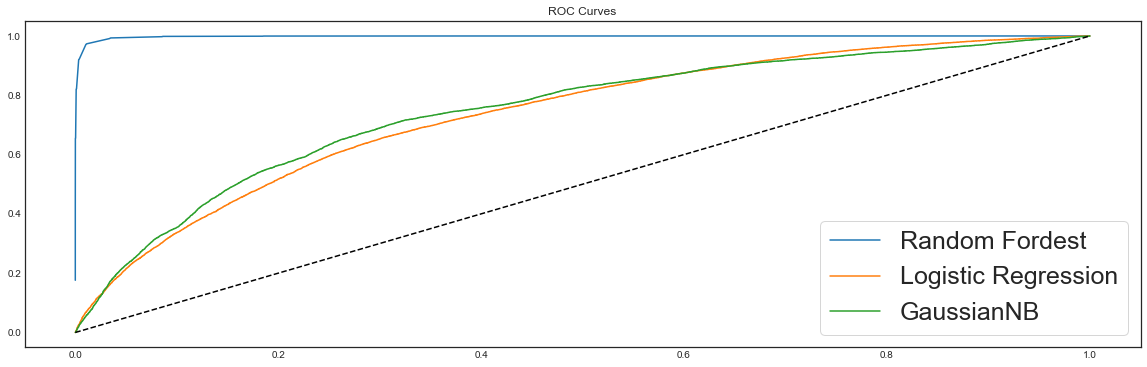

In [100]:
# Plot ROC Curves for all three models.
plt.figure(figsize = (20,6))
roc_plot(pipe_RF, 'Random Fordest')
roc_plot(pipe_LR, 'Logistic Regression')
roc_plot(pipe_NB, 'GaussianNB')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.legend(loc='best', frameon=True, fontsize=25)

In [ ]:
# I built three models: random forest, logistic regression and Gaussian naive bayes. 
# From the ROC curve, we can see that the random forest model performed the best.

#### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).


In [101]:
# From the feature selection (using Random Forest) I did earlier, we see that 'avg_dist' -  
# average distance in miles per trip taken in the first 30 days after signup 
# and 'weekday_pct' - percent of the user’s trips occurring during a weekday 
# are the most important features to determine whether a user is active or not. 
# Therefore, Ultimate can forcus on giving incentives to promote these two features.

# Current sample has three times more 'inactive' users than 'active' ones.
# Using a sample with balanced sample-size between 'active' and 'inactive' users 
# will be able to train the models better, and in turn give better predictions.

# From the correlation map (heatmap) I did earlier on the features, we see that
# the correlation between columns 'avg_surge' and 'surge_pct' is 0.79. 
# This can causes potential problems with collinearity with some predictive models. 
# We can delete either of the two columns and re-fit the models.